In [3]:
"""Simple plotting script for the paper."""

import matplotlib.pyplot as plt

# Define sparsity levels
sparsity_levels = [90, 95, 99, 99.5, 99.9]

# Model names to include
# models = ['Resnet18', 'Resnet18+PP', 'ZeroFL', 'ZeroFL+PP', 'Power-SWAT']
models = ["Top-k", "ZeroFL", "SparseFedPP"]

# Model performance data (accuracy)
performance_data = [
    {
        "mean": [80.56, 74.71, 66.27, 63.82, 31.79],
        "std": [1.90, 3.29, 5.08, 2.41, 19.10],
    },
    # {'mean': [82.27, 81.53, 75.76, 70.89, 62.67],
    # 'std': [2.21, 2.10, 1.78, 2.22, 2.19]},
    {
        "mean": [76.16, 75.53, 70.71, 56.02, 17.66],
        "std": [1.298, 2.27, 0.15, 3.95, 8.34],
    },
    # {'mean': [80.48, 79.03, 64.80, 51.43, 43.32],
    # 'std': [1.45, 1.92, 2.58, 3.66, 2.98]},
    {
        "mean": [82.13, 82.60, 77.71, 70.01, 60.39],
        "std": [1.23, 1.58, 1.69, 0.43, 3.191],
    },
]
# Resnet18 performance as a threshold (using first value as Resnet18 accuracy)
resnet18_threshold = 83.7

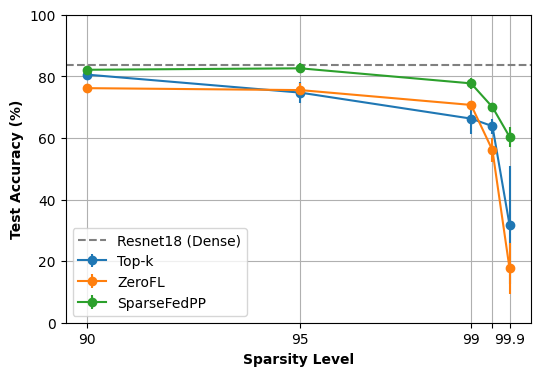

In [4]:
plt.figure(figsize=(6, 4))

# Plot each model's performance at different sparsity levels with error bars
for i, model in enumerate(models):
    mean_values = performance_data[i]["mean"]
    std_values = performance_data[i]["std"]
    plt.errorbar(sparsity_levels, mean_values, yerr=std_values, label=model, marker="o")

# Plot Resnet18 threshold line
plt.axhline(
    y=resnet18_threshold, color="gray", linestyle="--", label="Resnet18 (Dense)"
)

# Set plot properties
# plt.title('Model Performance at Different Sparsity Levels')
plt.xlabel("Sparsity Level", fontweight="bold")  # Make x-axis label bold
plt.ylabel("Test Accuracy (%)", fontweight="bold")  # Make y-axis label bold

# plt.xticks(sparsity_levels)
to_be_removed = 99.5
xticks_labels = [
    str(sparsity) if sparsity != to_be_removed else "" for sparsity in sparsity_levels
]
plt.xticks(sparsity_levels, xticks_labels)

plt.ylim(0, 100)  # Set the y-axis limits

plt.legend()
plt.grid(True)
plt.show()